In [1]:
from bs4 import BeautifulSoup
import logging
import re
import requests

In [2]:
class CountryLoader:
    # Class to load and process United Nations Member States

    def __init__(self):
        self.base_url = 'https://www.un.org/en/about-us/member-states'

        # Set up logger to log messages for various events and errors
        logging.basicConfig(level=logging.INFO) # Log messages with a security level of INFO or higher
        self.logger = logging.getLogger(__name__)
    
    def fetch_and_parse(self, url: str) -> BeautifulSoup:
        # Fetch content from the URL and return parsed BeautifulSoup object
        try:
            headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36'
            }
            response = requests.get(url, headers=headers, timeout=10)
            response.raise_for_status()
            return BeautifulSoup(response.content, 'lxml')

        except requests.RequestException as e:
            self.logger.error(f'Failed to fetch URL {url}: {str(e)}')
            raise

    def extract_countries(self, soup: BeautifulSoup): # -> List[str]
        # Extract country names from parsed HTML
        countries = []

        try:
            # 'mb-2' is a unique CSS class, not present elsewhere in the HTML
            # This div contains the countries inside 'col-md-12' divs
            # Names are contained in h2 elements with class 'mb-0'
            block = soup.find('div', class_='mb-2') # Works as of 22nd January 2025

            if block is None:
                self.logger.error(f'No div with class "mb-2" found, URL {url} structure has likely been changed"')
                                            
            for country in block.find_all('h2', class_='mb-0'): # Works as of 22nd Janaury 2025
                name = country.text.strip()
                if name:
                    countries.append(name)

            # Check if the countries list is populated
            if not countries:
                self.logger.warning('No country names found in "mb-2" block')

        except Exception as e:
            self.logger.error(f'An error occured while extracting country names: {str(e)}')
            raise

        return countries

    def clean_country_name(self, name: str) -> str:
        # Standardizing country names for clarity and consistency, where official names are more commonly referred to by other names in international contexts.
        name_mapping = {
            'Democratic People\'s Republic of Korea': 'North Korea',
            'Democratic Republic of the Congo': 'DR Congo',
            'Lao People’s Democratic Republic': 'Laos',
            'Republic of Korea': 'South Korea',
            'Republic of Moldova': 'Moldova',
            'Russian Federation': 'Russia',
            'Syrian Arab Republic': 'Syria',
            'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
            'United Republic of Tanzania': 'Tanzania',
        }

        if name in name_mapping:
            name = name_mapping[name] # Will change this later to generalize to lower case and other stuff

        # Some country names have official designations in brackets
        # Other country names like Venezuela have designations after a comma
        # Remove these since they aren't relevant in the game

        # Match sequence of characters in paranthesis and remove it
        name = re.sub(r'\([^)]*\)', '', name)

        # Remove everything after (and incluing) a comma
        name = re.sub(r',.*', '', name)

        return name.strip()

    def load_countries(self): # -> List[str]
        # Main method to load and process country data
        try:
            soup = self.fetch_and_parse(self.base_url)
            countries = self.extract_countries(soup)
            countries = [self.clean_country_name(country) for country in countries]

            return countries

        except Exception as e:
            self.logger.error(f'Failed to load countries: {str(e)}')
            raise

In [3]:
def load_country_data(): # -> List[str]
    # Wrapper function to create a class, load country data and return a list of countries
    loader = CountryLoader()
    return loader.load_countries()

# Test the loader
try:
    countries = load_country_data()
    print(f'Successfully extracted {len(countries)} countries')
    print('\n'.join(sorted(countries)))

except Exception as e:
    print(f'Error during testing: {str(e)}')

Successfully extracted 192 countries
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Côte D'Ivoire
DR Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritan

In [4]:
class CityLoader:
    # Class to load and process 500 most populated cities as per World Population Review

    def __init__(self):
        self.base_url = 'https://worldpopulationreview.com/cities'

        # Set up logger to log messages for various events and errors
        logging.basicConfig(level=logging.INFO) # Log messages with a security level of INFO or higher
        self.logger = logging.getLogger(__name__)
    
    def fetch_and_parse(self, url: str) -> BeautifulSoup:
        # Fetch content from the URL and return parsed BeautifulSoup object
        try:
            headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36'
            }
            response = requests.get(url, headers=headers, timeout=10)
            response.raise_for_status()
            return BeautifulSoup(response.content, 'lxml')

        except requests.RequestException as e:
            self.logger.error(f'Failed to fetch URL {url}: {str(e)}')
            raise

    def extract_cities(self, soup: BeautifulSoup): # -> List[str]
        # Extract city names from parsed HTML
        cities = []

        try:
            # 'my-6' is a unique CSS class, not present elsewhere in the HTML
            # This div contains the names of cities inside <a class="text-wpr-link">
            block = soup.find('div', class_='my-6') # Works as of 22nd January 2025

            if block is None:
                self.logger.error(f'No div with class "my-6" found, URL {url} structure has likely been changed"')
                                            
            for city in block.find_all('a', class_='text-wpr-link'): # Works as of 22nd Janaury 2025
                name = city.text.strip()
                if name:
                    cities.append(name)

            # Check if the cities list is populated
            if not cities:
                self.logger.warning('No city names found in "my-6" block')

        except Exception as e:
            self.logger.error(f'An error occured while extracting city names: {str(e)}')
            raise

        return cities

    def load_cities(self): # -> List[str]
        # Main method to load and process city data
        try:
            soup = self.fetch_and_parse(self.base_url)
            cities = self.extract_cities(soup)

            return cities

        except Exception as e:
            self.logger.error(f'Failed to load cities: {str(e)}')
            raise

In [5]:
def load_city_data(): # -> List[str]
    # Wrapper function to create a class, load city data and return a list of cities
    loader = CityLoader()
    return loader.load_cities()

# Test the loader
try:
    cities = load_city_data()[:500]
    print(f'Successfully extracted {len(cities)} cities')
    print('\n'.join(cities[:10])) # Printing 10 city names for testing

except Exception as e:
    print(f'Error during testing: {str(e)}')

Successfully extracted 500 cities
Tokyo
Delhi
Shanghai
Dhaka
Sao Paulo
Cairo
Mexico City
Beijing
Mumbai
Osaka


In [6]:
import networkx as nx
from pyvis.network import Network

def create_graph(places, title, height='750px'):
    '''
    Crates and visualizes an Atlas game graph using Pyvis

    Args:
        places: List of place names (countries/cities)
        title: Title for the graph visualization
        height: Height of the visualization
    '''

    # Create NetworkX graph
    G = nx.DiGraph()
    G.add_nodes_from(places)

    # Add edges based on Atlas rules
    for source in places:
        last_letter = source[-1].lower()
        for target in places:
            first_letter = target[0].lower()
            if target != source and last_letter == first_letter:
                G.add_edge(source, target)

    # Convert to Pyvis network
    # Visualization spans the entire width of the container taat holds the graph visualization
    # Background color of visualization is white
    net = Network(height=height, width="100%", directed=True, bgcolor='#ffffff')
    net.repulsion()

    # Take the NetworkX graph and converts it into a Pyvis-compatible format
    net.from_nx(G)

    '''
    Configure for better visualization
    
    physics: Dictates how nodes and edges are positioned in the visualization
        hierarchicalRepulsion: Organizes nodes in a hierarchical layout while applying forces to avoid overlap
        minVelocity: Sets the minimum speed for nodes to stop moving
    '''
    
    net.set_options("""
    var options = {
        "nodes": {
            "font": {
                "size": 12
            }
        },
        "edges": {
            "arrows": {
                "to": {
                    "enabled": true,
                    "scaleFactor": 0.5
                }
            },
            "smooth": {
                "type": "continuous",
                "forceDirection": "none"
            }
        },
        "physics": {
            "forceAtlas2Based": {
                "gravitationalConstant": -100,
                "centralGravity": 0.01,
                "springLength": 200,
                "springConstant": 0.08,
                "damping": 0.4,
                "avoidOverlap": 1
            },
            "minVelocity": 23,
            "solver": "forceAtlas2Based"
        }
    }
    """)

    # Set node properties
    for node in net.nodes:
        '''
        Assign a unique colour to each node based on first letter of its name
        Extract the first letter of the node's name
        Map the hash of the letter to a range of hues (0-359) in the HSL color space
        HSLA format: base colour, saturation, lightness (brightness), alpha (transparency)
        Result: Nodes with the same starting letter share similar colours
        '''
        hue = hash(node['id'][0].lower()) % 360
        node['color'] = f'hsla({hue}, 70%, 60%, 0.9)'
        
        in_degree = G.in_degree(node['id'])
        out_degree = G.out_degree(node['id'])
        node['size'] = 10
        
        # Add hover information
        node['title'] = (
            f"Place: {node['id']}<br>"
            f"First Letter: {node['id'][0]}<br>"
            f"Last Letter: {node['id'][-1]}<br>"
            f"Incoming Moves: {in_degree}<br>"
            f"Possible Moves: {out_degree}"
        )
    
    # Set edge properties
    for edge in net.edges:
        edge['color'] = {'color': '#848484', 'opacity': 0.6}
        edge['width'] = 1
    
    # Save the visualization
    fileName = f"atlas_{title.lower().replace(' ', '_')}.html"
    net.show(fileName)
    
    return G

def print_graph_stats(G, name):
    # Print basic statistics about the graph
    print(f'Stats for {name}:')
    print(f'Number of places: {G.number_of_nodes()}')
    print(f'Number of possible moves: {G.number_of_edges()}')
    print(f'Average moves per place: {G.number_of_edges() / G.number_of_nodes():.2f}')
    
    # Find places with most and least moves
    out_degrees = dict(G.out_degree())
    max_moves = max(out_degrees.items(), key=lambda x: x[1])
    min_moves = min(out_degrees.items(), key=lambda x: x[1])
    
    print(f'Most possible moves: {max_moves[0]} ({max_moves[1]} moves)')
    print(f'Least possible moves: {min_moves[0]} ({min_moves[1]} moves)')

In [7]:
# Create and visualize all three graphs
country_graph = create_graph(places=countries, title='Countries')
print_graph_stats(country_graph, 'Countries Graph')

# city_graph = create_graph(places=cities, title='Cities')
# print_graph_stats(city_graph, 'Cities Graph')

# combined_graph = create_graph(places=countries + cities, title='Combined')
# print_graph_stats(combined_graph, 'Combined Graph')

Stats for Countries Graph:
Number of places: 192
Number of possible moves: 2001
Average moves per place: 10.42
Most possible moves: Bahamas (26 moves)
Least possible moves: Burkina Faso (1 moves)


In [8]:
from collections import defaultdict
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [9]:
# Helper: Build a directed grpah from the given list of names as per the rules of the game
def build_graph(names):
    G = nx.DiGraph()
    # Normalize names (stripping, and converting the entire name to lower case)
    names_norm = [name.strip().lower() for name in names]
    for name in names_norm:
        G.add_node(name)
    for a in names_norm:
        for b in names_norm:
            if a != b and a[-1] == b[0]:
                G.add_edge(a, b)
    return G

# Task 1 - Graph Analysis
## 1. Out-Degree Differential
For each node v, we compute:
$$ M(v) = \min_{u \in \text{successors}(v)} d_{\text{out}}(u) - d_{\text{out}}(v) $$

A high value of M(v) means that the move v (where you say v and it's now the opponent's turn) leaves the opponent with few options, but even their best response leaves you with many moves

In [10]:
def outdegree_differential(G):
    M = {}
    for v in G.nodes():
        outdegree_v = G.out_degree(v)
        successors = list(G.successors(v))
        if successors:
            min_successor = min(G.out_degree(u) for u in successors)
            M[v] = min_successor - outdegree_v
        else:
            # Terminal node
            M[v] = - outdegree_v

    return M

def plot_outdegree_differential(M, title='Out-Degree Differential'):
    # Scatter plot: each point is (index, M(v))
    nodes = list(M.keys())
    values = [M[v] for v in nodes]
    plt.figure(figsize=(10,5))
    plt.bar(range(len(nodes)), values, tick_label=nodes)
    plt.xticks(rotation=90)
    plt.ylabel('M(v)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

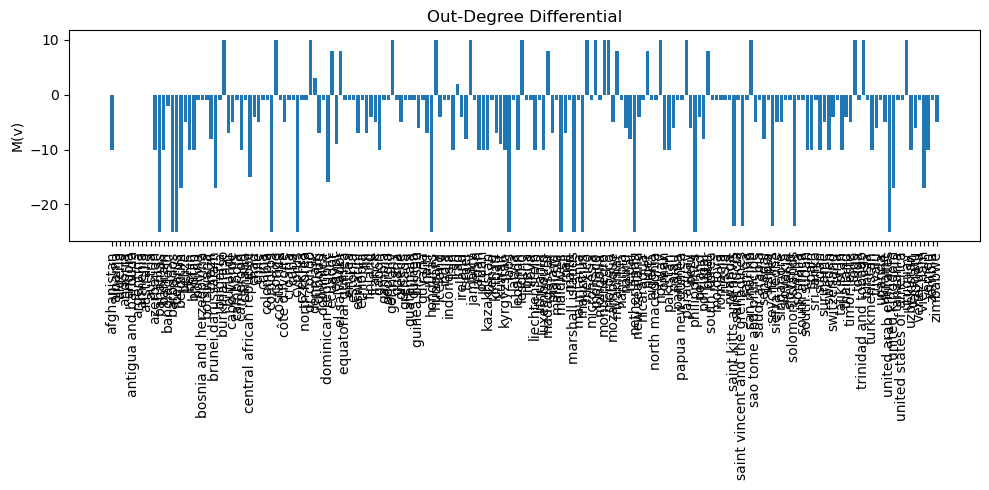

In [11]:
G = build_graph(countries)
M = outdegree_differential(G)
plot_outdegree_differential(M)

Starting position: abidjan
Move 0 (Strategic): ningbo - 21 moves available
Move 1 (Random): ottawa - 5 moves available
Move 2 (Strategic): adelaide - 33 moves available
Move 3 (Random): esfahan - 3 moves available
Move 4 (Strategic): nairobi - 20 moves available
Move 5 (Random): istanbul - 6 moves available
Move 6 (Strategic): lahore - 26 moves available
Move 7 (Random): edmonton - 2 moves available
Move 8 (Strategic): new taipei - 19 moves available
Move 9 (Random): ibadan - 5 moves available
Move 10 (Strategic): nnewi - 18 moves available
Move 11 (Random): islamabad - 4 moves available
Move 12 (Strategic): daegu - 22 moves available
Move 13 (Random): uyo - 3 moves available
Move 14 (Strategic): ouagadougou - 4 moves available
Move 15 (Random): urumqi - 2 moves available
Move 16 (Strategic): indore - 3 moves available
Move 17 (Random): ekurhuleni - 1 moves available
Move 18 (Strategic): izmir - 2 moves available
Move 19 (Random): raipur - 12 moves available
Move 20 (Strategic): rome -

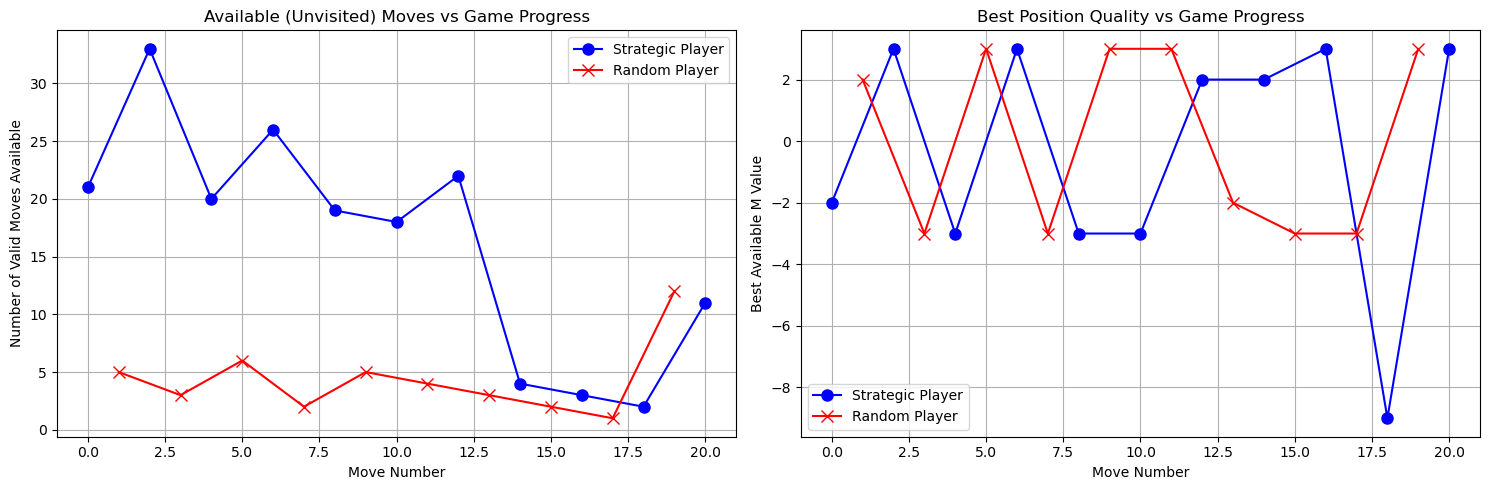

In [12]:
import random

def simulate_single_game(G, M, max_moves=30):
    '''
    Simulate one game, alternating between strategic and random moves.
    Game ends when no valid (unvisited) moves are available.
    '''
    current = random.choice(list(G.nodes()))
    visited = {current} # Track visited nodes
    
    # Track metrics for each move
    moves_history = [] # Will store (move_number, player, num_valid_moves, best_M)
    
    print(f'Starting position: {current}')
    
    for move in range(max_moves):
        # Get only unvisited successors
        valid_successors = [n for n in G.successors(current) if n not in visited]
        
        if not valid_successors:
            print(f'Game Over at move {move} - no unvisited nodes available from {current}')
            break
            
        # Calculate metrics for this position
        num_moves = len(valid_successors)
        best_M = max(M[s] for s in valid_successors) if valid_successors else float('-inf')
        
        # Store the state
        is_strategic = (move % 2 == 0)
        player = 'Strategic' if is_strategic else 'Random'
        moves_history.append((move, player, num_moves, best_M))
        
        # Make move
        if is_strategic:
            current = max(valid_successors, key=lambda x: M[x])
        else:
            current = random.choice(valid_successors)
            
        visited.add(current)
        print(f'Move {move} ({player}): {current} - {num_moves} moves available')
    
    # Plot the results
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Number of available moves
    plt.subplot(1, 2, 1)
    strategic_moves = [(m[0], m[2]) for m in moves_history if m[1] == 'Strategic']
    random_moves = [(m[0], m[2]) for m in moves_history if m[1] == 'Random']
    
    plt.plot(*zip(*strategic_moves), 'bo-', label='Strategic Player', markersize=8)
    plt.plot(*zip(*random_moves), 'rx-', label='Random Player', markersize=8)
    plt.xlabel('Move Number')
    plt.ylabel('Number of Valid Moves Available')
    plt.title('Available (Unvisited) Moves vs Game Progress')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Best M value available
    plt.subplot(1, 2, 2)
    strategic_M = [(m[0], m[3]) for m in moves_history if m[1] == 'Strategic']
    random_M = [(m[0], m[3]) for m in moves_history if m[1] == 'Random']
    
    plt.plot(*zip(*strategic_M), 'bo-', label='Strategic Player', markersize=8)
    plt.plot(*zip(*random_M), 'rx-', label='Random Player', markersize=8)
    plt.xlabel('Move Number')
    plt.ylabel('Best Available M Value')
    plt.title('Best Position Quality vs Game Progress')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return moves_history

# Run one game simulation
G = build_graph(cities)
M = outdegree_differential(G)
game_history = simulate_single_game(G, M)

In [16]:
import random

def outdegree_differential(G):
    # Calculate outdegree differential for each node
    M = {}
    for v in G.nodes():
        outdegree_v = G.out_degree(v)
        successors = list(G.successors(v))
        if successors:
            min_successor = min(G.out_degree(u) for u in successors)
            M[v] = min_successor - outdegree_v
        else:
            M[v] = -outdegree_v
    return M

def strategic_move(G, current_node, used_nodes, M):
    # Make a move using the outdegree differential strategy
    available_moves = [n for n in G.successors(current_node) if n not in used_nodes]
    if not available_moves:
        return None
    
    # Choose move with highest outdegree differential
    return max(available_moves, key=lambda x: M[x])

def random_move(G, current_node, used_nodes):
    # Make a random valid move
    available_moves = [n for n in G.successors(current_node) if n not in used_nodes]
    if not available_moves:
        return None
    return random.choice(available_moves)

def play_game(G, player1_strategic=False, player2_strategic=False):
    '''
    Simulate one game of Atlas.
    Returns 1 if player 1 wins, 2 if player 2 wins.
    '''
    used_nodes = set()
    M = outdegree_differential(G)
    
    # Start with random node
    current_node = random.choice(list(G.nodes()))
    used_nodes.add(current_node)
    
    while True:
        # Player 1's turn
        if player1_strategic:
            next_node = strategic_move(G, current_node, used_nodes, M)
        else:
            next_node = random_move(G, current_node, used_nodes)
            
        if next_node is None:
            return 2 # Player 1 can't move, Player 2 wins
            
        current_node = next_node
        used_nodes.add(current_node)
        
        # Player 2's turn
        if player2_strategic:
            next_node = strategic_move(G, current_node, used_nodes, M)
        else:
            next_node = random_move(G, current_node, used_nodes)
            
        if next_node is None:
            return 1 # Player 2 can't move, Player 1 wins
            
        current_node = next_node
        used_nodes.add(current_node)

def run_simulations(n_games=1000):
    # Run multiple game simulations with different strategy combinations
    G = build_graph(countries)
    results = defaultdict(int)
    
    # Test different strategy combinations
    scenarios = [
        (True, True, 'Both Strategic'),
        (True, False, 'P1 Strategic vs P2 Random'),
        (False, True, 'P1 Random vs P2 Strategic'),
        (False, False, 'Both Random')
    ]
    
    for p1_strat, p2_strat, scenario in scenarios:
        wins = defaultdict(int)
        for _ in range(n_games):
            winner = play_game(G, p1_strat, p2_strat)
            wins[winner] += 1
        
        p1_win_rate = wins[1] / n_games * 100
        p2_win_rate = wins[2] / n_games * 100
        
        print(f'\n{scenario}:')
        print(f'Player 1 Win Rate: {p1_win_rate:.2f}%')
        print(f'Player 2 Win Rate: {p2_win_rate:.2f}%')

if __name__ == '__main__':
    print("Running Atlas game simulations...")
    run_simulations(1000)

Running Atlas game simulations...

Both Strategic:
Player 1 Win Rate: 49.10%
Player 2 Win Rate: 50.90%

P1 Strategic vs P2 Random:
Player 1 Win Rate: 63.50%
Player 2 Win Rate: 36.50%

P1 Random vs P2 Strategic:
Player 1 Win Rate: 26.30%
Player 2 Win Rate: 73.70%

Both Random:
Player 1 Win Rate: 48.10%
Player 2 Win Rate: 51.90%


## 2. Entropy Minimization and Forced Predictability
The goal is to make moves that keep many options open for your next turns, while forcing our opponent into positions where they have only a few (or very predictable) moves

Shannon entropy gives us a way to measure the uncertainty of the moves available from a certain position. High entropy means that many options are available, and the weight of these options is fairly balanced. Low entropy means that either there are very few options, or that most of the probability is concentrated in just one or two moves - making the opponent's next step much more predictable.

### How It Works
- For each move you can make, simulate the set of responses your opponent can make
- Define a weight which combines the out-degree of those responses along with a popularity score. The popularity score reflects how well-known a place is, i.e., how likely it is to be chosen in real play
- For each possible move i available to the opponent, compute $w_i' = (\text{Out-degree of move } i) \times q_i$, where $q_i$ is the normalized popularity of that node
- Normalize $p_i = \frac{w_i'}{\sum_j w_j'}$
- Using these probabilities, calculate Shannon entropy $H = -\sum_i p_i \log_2 p_i$
- $\text{Score}(v) = H_{\text{self}}(v) - \gamma H_{\text{opp}}(v)$
- $H_{\text{opp}}(v)$ is the entropy computed for the opponent's next moves from candidate $v$
- $H_{\text{self}}(v)$ is a similar estimate for yur own future moves after the opponent responds
- $\gamma$ is a parameter that lets us control how heavily you penalize low predictability on the opponent’s side
- A higher candidate score suggests that the move will keep you flexible while forcing the opponent into a narrow, predictable set of options

In [17]:
import math

# Popularity dictionary, can be filled in according to how probable it is that countries are known by the opponent
popularity = {}

for country in countries:
    popularity[country] = 1

def adjusted_weight(G, node):
    '''
    Returns the adjusted weight for a node by multiplying its out-degree by its popularity score.
    '''
    # If the node is not found in the popularity dict, default to 1.0
    pop = popularity.get(node, 1.0)
    return G.out_degree(node) * pop

def weighted_entropy(G, nodes):
    '''
    Computes the weighted Shannon entropy for a set of nodes.
    Instead of using raw out-degrees, we use the adjusted weight (out_degree * popularity).
    '''
    weights = [adjusted_weight(G, n) for n in nodes]
    total = sum(weights)
    if total == 0:
        return 0  # No moves available => entropy is 0.
    entropy = 0
    for w in weights:
        if w > 0:
            p = w / total
            entropy -= p * math.log(p, 2)
    return entropy

def opponent_entropy(G, candidate):
    '''
    Computes the weighted entropy of the opponent's options from the candidate move.
    Uses adjusted weights to reflect both connectivity and popularity.
    '''
    opp_neighbors = list(G.successors(candidate))
    return weighted_entropy(G, opp_neighbors)

def self_entropy(G, candidate):
    '''
    Estimates your own future flexibility by computing the expected entropy
    of the moves available after the opponent moves.
    
    For each opponent move (successor of candidate), compute the entropy of its successors,
    then take a weighted average (again, using adjusted weights).
    '''
    opp_neighbors = list(G.successors(candidate))
    if not opp_neighbors:
        return 0
    entropy_list = []
    weights = []
    for w in opp_neighbors:
        next_moves = list(G.successors(w))
        entropy_w = weighted_entropy(G, next_moves)
        entropy_list.append(entropy_w)
        weights.append(adjusted_weight(G, w))
    total_weight = sum(weights)
    if total_weight == 0:
        return 0
    avg_entropy = sum(e * (w / total_weight) for e, w in zip(entropy_list, weights))
    return avg_entropy

def candidate_score(G, candidate, gamma=1.0):
    '''
    Combines the metrics to produce a score for a candidate move.
    
    A higher score means that after the move, your expected future move entropy (flexibility)
    is higher relative to the opponent's, leading to a more favorable, predictable situation for them.
    '''
    H_opp = opponent_entropy(G, candidate)
    H_self = self_entropy(G, candidate)
    score = H_self - gamma * H_opp
    return score

def select_best_move(G, current_node, gamma=1.0):
    '''
    Evaluate all candidate moves (successors) from the current node and return the move with the highest score.
    '''
    candidates = list(G.successors(current_node))
    if not candidates:
        return None, None  # No moves available.
    
    scores = {}
    for cand in candidates:
        scores[cand] = candidate_score(G, cand, gamma)
        print(f'Candidate: {cand}, Opponent Entropy: {opponent_entropy(G, cand):.3f}, '
              f'Self Entropy: {self_entropy(G, cand):.3f}, Score: {scores[cand]:.3f}')
    
    best_move = max(scores, key=scores.get)
    return best_move, scores

G = build_graph(countries)
current_node = 'senegal'
best_move, scores = select_best_move(G, current_node, gamma=1.0)
if best_move:
    print(f'\nBest move from {current_node} is: {best_move} with score {scores[best_move]:.3f}')
else:
    print("No available moves from the current node.")

Candidate: laos, Opponent Entropy: 4.531, Self Entropy: 3.638, Score: -0.893
Candidate: latvia, Opponent Entropy: 3.458, Self Entropy: 3.291, Score: -0.167
Candidate: lebanon, Opponent Entropy: 3.171, Self Entropy: 3.463, Score: 0.292
Candidate: lesotho, Opponent Entropy: 0.000, Self Entropy: 3.171, Score: 3.171
Candidate: liberia, Opponent Entropy: 3.458, Self Entropy: 3.291, Score: -0.167
Candidate: libya, Opponent Entropy: 3.458, Self Entropy: 3.291, Score: -0.167
Candidate: liechtenstein, Opponent Entropy: 3.171, Self Entropy: 3.463, Score: 0.292
Candidate: lithuania, Opponent Entropy: 3.458, Self Entropy: 3.291, Score: -0.167
Candidate: luxembourg, Opponent Entropy: 3.354, Self Entropy: 3.287, Score: -0.067

Best move from senegal is: lesotho with score 3.171


Starting position: qinhuangdao
Move 0 (Entropy): ouagadougou - 5 moves available
Move 1 (Random): ulaanbaatar - 3 moves available
Move 2 (Entropy): rio de janeiro - 12 moves available
Move 3 (Random): onitsha - 4 moves available
Move 4 (Entropy): antananarivo - 34 moves available
Move 5 (Random): omsk - 3 moves available
Move 6 (Entropy): kano - 29 moves available
Move 7 (Random): ottawa - 2 moves available
Move 8 (Entropy): aleppo - 33 moves available
Move 9 (Random): osaka - 1 moves available
Move 10 (Entropy): adelaide - 32 moves available
Move 11 (Random): esfahan - 3 moves available
Move 12 (Entropy): ningbo - 21 moves available
Game Over at move 13 - no unvisited nodes available from ningbo


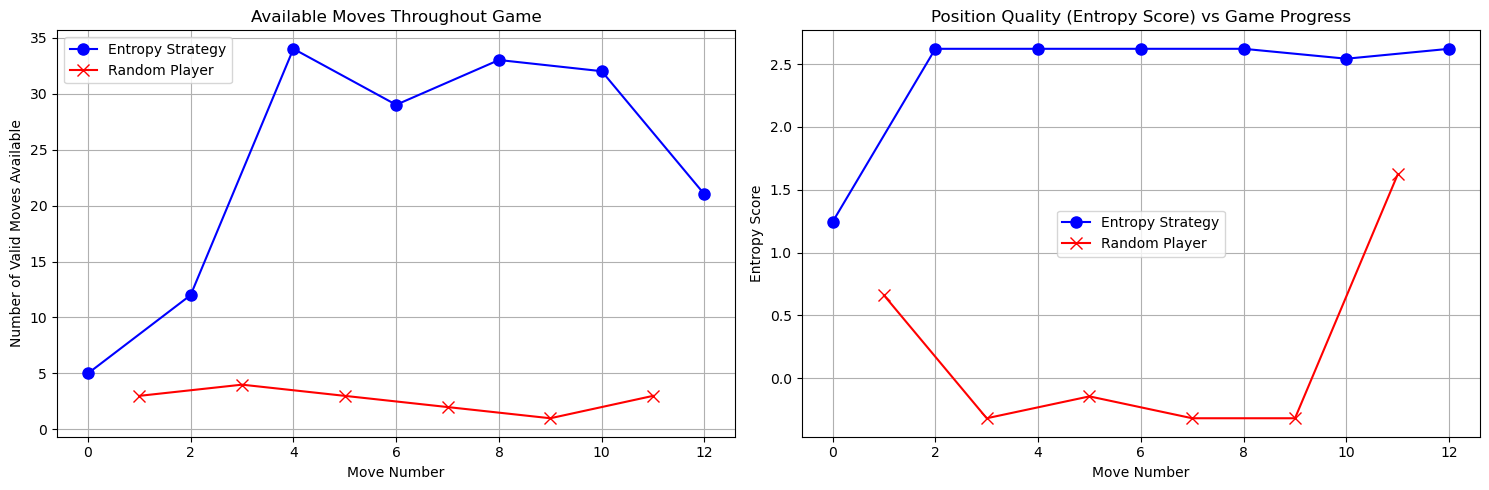

In [18]:
def simulate_single_game_entropy(G, max_moves=30):
    # Simulate one game comparing entropy-based strategy vs random
    current = random.choice(list(G.nodes()))
    visited = {current}
    
    # Track metrics for each move
    moves_history = [] # Will store (move_number, player, num_moves, entropy_score)
    
    print(f'Starting position: {current}')
    
    for move in range(max_moves):
        # Get only unvisited successors
        valid_successors = [n for n in G.successors(current) if n not in visited]
        
        if not valid_successors:
            print(f'Game Over at move {move} - no unvisited nodes available from {current}')
            break
            
        # Calculate metrics
        num_moves = len(valid_successors)
        
        is_strategic = (move % 2 == 0)
        player = 'Entropy' if is_strategic else 'Random'
        
        if is_strategic:
            # Calculate entropy scores for all valid moves
            scores = {n: candidate_score(G, n) for n in valid_successors}
            best_score = max(scores.values()) if scores else float('-inf')
            current = max(scores, key=scores.get)
            moves_history.append((move, player, num_moves, best_score))
        else:
            # Random player - still calculate entropy score of their position
            random_score = candidate_score(G, random.choice(valid_successors))
            current = random.choice(valid_successors)
            moves_history.append((move, player, num_moves, random_score))
        
        visited.add(current)
        print(f'Move {move} ({player}): {current} - {num_moves} moves available')
    
    # Plot the results
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Number of available moves
    plt.subplot(1, 2, 1)
    strategic_moves = [(m[0], m[2]) for m in moves_history if m[1] == 'Entropy']
    random_moves = [(m[0], m[2]) for m in moves_history if m[1] == 'Random']
    
    plt.plot(*zip(*strategic_moves), 'bo-', label='Entropy Strategy', markersize=8)
    plt.plot(*zip(*random_moves), 'rx-', label='Random Player', markersize=8)
    plt.xlabel('Move Number')
    plt.ylabel('Number of Valid Moves Available')
    plt.title('Available Moves Throughout Game')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Entropy scores
    plt.subplot(1, 2, 2)
    strategic_scores = [(m[0], m[3]) for m in moves_history if m[1] == 'Entropy']
    random_scores = [(m[0], m[3]) for m in moves_history if m[1] == 'Random']
    
    plt.plot(*zip(*strategic_scores), 'bo-', label='Entropy Strategy', markersize=8)
    plt.plot(*zip(*random_scores), 'rx-', label='Random Player', markersize=8)
    plt.xlabel('Move Number')
    plt.ylabel('Entropy Score')
    plt.title('Position Quality (Entropy Score) vs Game Progress')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return moves_history

G = build_graph(cities)
# Run simulation
game_history = simulate_single_game_entropy(G)

In [19]:
def initialize_popularity(places):
    # Initialize popularity scores for all places
    popularity = {}
    for place in places:
        # Random popularity between 0.5 and 1.5
        popularity[place] = random.uniform(0.5, 1.5)
    return popularity

def adjusted_weight(G, node, popularity):
    # Returns the adjusted weight for a node
    pop = popularity.get(node, 1.0)
    return G.out_degree(node) * pop

def weighted_entropy(G, nodes, popularity):
    # Computes the weighted Shannon entropy for a set of nodes
    weights = [adjusted_weight(G, n, popularity) for n in nodes]
    total = sum(weights)
    if total == 0:
        return 0
    
    entropy = 0
    for w in weights:
        if w > 0:
            p = w / total
            entropy -= p * math.log(p, 2)
    return entropy

def opponent_entropy(G, candidate, popularity):
    # Computes the weighted entropy of opponent's options
    opp_neighbors = list(G.successors(candidate))
    return weighted_entropy(G, opp_neighbors, popularity)

def self_entropy(G, candidate, popularity):
    # Estimates future flexibility through expected entropy
    opp_neighbors = list(G.successors(candidate))
    if not opp_neighbors:
        return 0
    
    entropy_list = []
    weights = []
    for w in opp_neighbors:
        next_moves = list(G.successors(w))
        entropy_w = weighted_entropy(G, next_moves, popularity)
        entropy_list.append(entropy_w)
        weights.append(adjusted_weight(G, w, popularity))
    
    total_weight = sum(weights)
    if total_weight == 0:
        return 0
    
    avg_entropy = sum(e * (w / total_weight) for e, w in zip(entropy_list, weights))
    return avg_entropy

def entropy_move(G, current_node, used_nodes, popularity, gamma=1.0):
    # Make a move using entropy-based strategy
    available_moves = [n for n in G.successors(current_node) if n not in used_nodes]
    if not available_moves:
        return None
    
    scores = {}
    for move in available_moves:
        H_opp = opponent_entropy(G, move, popularity)
        H_self = self_entropy(G, move, popularity)
        scores[move] = H_self - gamma * H_opp
    
    return max(scores.items(), key=lambda x: x[1])[0]

def random_move(G, current_node, used_nodes):
    # Make a random valid move
    available_moves = [n for n in G.successors(current_node) if n not in used_nodes]
    if not available_moves:
        return None
    return random.choice(available_moves)

def play_game(G, popularity, player1_entropy=False, player2_entropy=False):
    '''
    Simulate one game of Atlas.
    Returns 1 if player 1 wins, 2 if player 2 wins.
    '''
    used_nodes = set()
    current_node = random.choice(list(G.nodes()))
    used_nodes.add(current_node)
    
    while True:
        # Player 1's turn
        if player1_entropy:
            next_node = entropy_move(G, current_node, used_nodes, popularity)
        else:
            next_node = random_move(G, current_node, used_nodes)
            
        if next_node is None:
            return 2 # Player 1 can't move, Player 2 wins
            
        current_node = next_node
        used_nodes.add(current_node)
        
        # Player 2's turn
        if player2_entropy:
            next_node = entropy_move(G, current_node, used_nodes, popularity)
        else:
            next_node = random_move(G, current_node, used_nodes)
            
        if next_node is None:
            return 1 # Player 2 can't move, Player 1 wins
            
        current_node = next_node
        used_nodes.add(current_node)

def run_simulations(n_games=1):
    # Run multiple game simulations with different strategy combinations
    G = build_graph(countries)
    popularity = initialize_popularity(countries)
    results = defaultdict(int)
    
    # Test different strategy combinations
    scenarios = [
        (True, True, 'Both Entropy'),
        (True, False, 'P1 Entropy vs P2 Random'),
        (False, True, 'P1 Random vs P2 Entropy'),
        # (False, False, 'Both Random')
    ]
    
    for p1_entropy, p2_entropy, scenario in scenarios:
        wins = defaultdict(int)
        for _ in range(n_games):
            winner = play_game(G, popularity, p1_entropy, p2_entropy)
            wins[winner] += 1
        
        p1_win_rate = wins[1] / n_games * 100
        p2_win_rate = wins[2] / n_games * 100
        
        print(f'\n{scenario}:')
        print(f'Player 1 Win Rate: {p1_win_rate:.2f}%')
        print(f'Player 2 Win Rate: {p2_win_rate:.2f}%')

if __name__ == '__main__':
    print("Running Atlas game simulations using entropy-based strategy...")
    run_simulations(100) 

Running Atlas game simulations using entropy-based strategy...

Both Entropy:
Player 1 Win Rate: 76.00%
Player 2 Win Rate: 24.00%

P1 Entropy vs P2 Random:
Player 1 Win Rate: 89.00%
Player 2 Win Rate: 11.00%

P1 Random vs P2 Entropy:
Player 1 Win Rate: 21.00%
Player 2 Win Rate: 79.00%


## 3. Centralized Choke Point Strategy
- Oftentimes, we know that saying a particular name will put the opponent at a disadvantage, but the current state of the game does not allow us to say that name (for example, we want to say Hungary, the ‘y’ country names having been exhausted, but the current country is India, and we have no idea how to get to that point)
- The strategy is based on the observation that some nodes in the directed graph act as critical “bridges” or bottlenecks between different regions or communities of the graph. These nodes usually have high betweenness centrality because many paths between other nodes pass through them
- This node is a “choke point”, it can act as a gateway through which the game must pass to eventually reach T.
- The rationale is that, even if the direct move to a powerful or strategically advantageous country (say "Hungary") isn’t available due to game constraints, steering the game through this choke node can eventually lead you closer to that target move.
- The code computes a frequency ratio, which is the fraction of all considered paths that include the choke node. A high ratio means that many routes from S to T rely on that node, underscoring its strategic importance.
- It also calculates the betweenness centrality of the choke node—a network metric that quantifies how often the node appears on shortest paths between other nodes. A high betweenness centrality indicates that the node is a key gateway or bridge in the network.
- To refine the evaluation, the strategy takes into account the node’s out-degree (how many moves it offers) to ensure that it isn’t just a dead end with limited options. These components are combined into a composite score:
$$\text{Composite Score} = \text{frequency ratio} \times \left( \frac{\text{betweenness centrality}}{\text{out-degree} + \epsilon} \right)$$
- This score reflects both the prevalence of the choke node in pathways from S to T and its overall connectivity and influence in the network.


Choke Node: afghanistan, Frequency Ratio: 0.50

Evaluating candidate move T = norway when S = india:
Composite Score: 0.0075
Metrics: {'even_paths_count': 18, 'choke_node': 'afghanistan', 'ratio': 0.5, 'choke_betweenness': 0.16417574798467077, 'choke_out_degree': 11, 'composite_score': 0.007455756039267519}

Shortest even-length paths from S to T:
['india', 'albania', 'afghanistan', 'norway']
['india', 'albania', 'azerbaijan', 'norway']
['india', 'algeria', 'afghanistan', 'norway']
['india', 'algeria', 'azerbaijan', 'norway']
['india', 'andorra', 'afghanistan', 'norway']
['india', 'andorra', 'azerbaijan', 'norway']
['india', 'angola', 'afghanistan', 'norway']
['india', 'angola', 'azerbaijan', 'norway']
['india', 'antigua and barbuda', 'afghanistan', 'norway']
['india', 'antigua and barbuda', 'azerbaijan', 'norway']
['india', 'argentina', 'afghanistan', 'norway']
['india', 'argentina', 'azerbaijan', 'norway']
['india', 'armenia', 'afghanistan', 'norway']
['india', 'armenia', 'azerbaija

C:\Users\sudar\anaconda3\envs\precogtaskenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


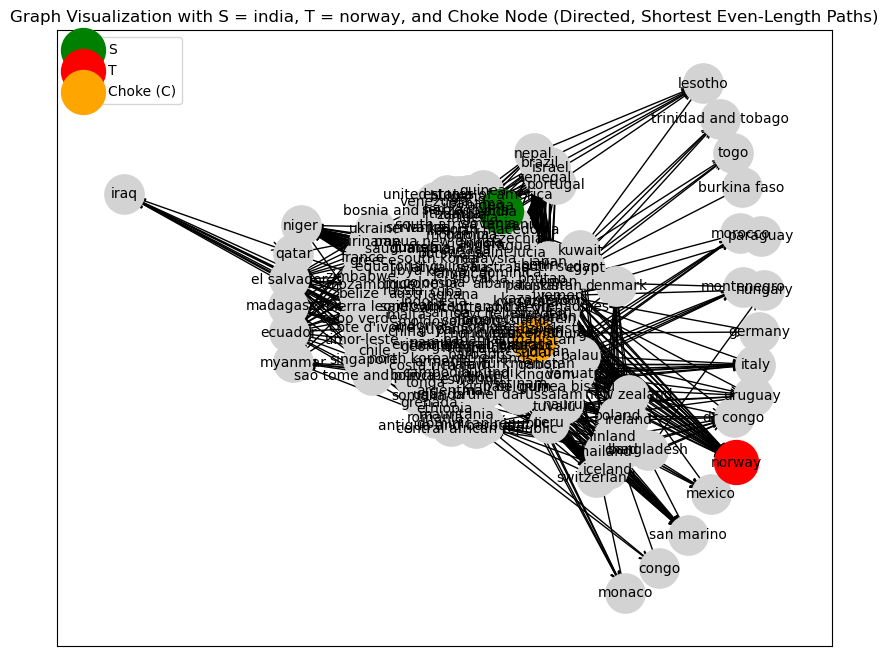

In [20]:
G = build_graph(countries)
S = 'india' # Opponent's move (source)
T = 'norway' # Candidate move (target)

# ----------------------------
# 2. Compute Shortest Even-Length Paths (Directed)
# ----------------------------
def get_shortest_even_paths_directed(G, source, target):
    '''
    Computes the shortest path length L from source to target in the directed graph G.
    If L is odd, return all shortest paths of length L. (odd here cuz L is number of edges)
    If L is even, return all simple paths of length L+1 (the next even number).
    '''
    try:
        L = nx.shortest_path_length(G, source=source, target=target)
    except nx.NetworkXNoPath:
        return []
    
    if L % 2 == 1:
        # If L is odd, return all shortest paths of length L (number of nodes is even)=
        paths = list(nx.all_shortest_paths(G, source=source, target=target))
        even_paths = [path for path in paths if len(path) == L]
        return even_paths
    else:
        # L is even, desired even-length path is L+1
        desired_length = L + 1
        # Use all_simple_paths with cutoff = desired_length + 1, then filter for paths of exactly desired_length.
        paths = list(nx.all_simple_paths(G, source=source, target=target, cutoff=desired_length+1))
        even_paths = [path for path in paths if len(path) == desired_length+1]
        return even_paths
    
# ----------------------------
# 3. Identify the Common Choke Node and Compute Frequency Ratio
# ----------------------------
def find_common_choke_node_directed(G, source, target, epsilon=0.01):
    '''
    Given a directed graph G, source S, and target T,
    consider only the shortest even-length paths (computed from get_shortest_even_paths_directed).
    Identify the intermediate node (excluding source and target) that appears most frequently.
    If a direct edge exists (path length == 2), return target with ratio 1.
    '''
    paths = get_shortest_even_paths_directed(G, source, target)
    if not paths:
        return None, 0
    if len(paths[0]) == 2:
        return target, 1.0 # Direct edge case
    
    node_freq = {}
    for path in paths:
        # Exclude source and target
        for node in path[1:-1]:
            node_freq[node] = node_freq.get(node, 0) + 1
    if not node_freq:
        return None, epsilon
    choke_node = max(node_freq, key=node_freq.get)
    frequency = node_freq[choke_node]
    ratio = frequency / len(paths)
    if ratio == 0:
        ratio = epsilon
    return choke_node, ratio

choke_node, ratio = find_common_choke_node_directed(G, S, T)
print(f'\nChoke Node: {choke_node}, Frequency Ratio: {ratio:.2f}')

# ----------------------------
# 4. Composite Score Calculation
# ----------------------------
def evaluate_candidate_move_directed(G, S, T, epsilon=0.01):
    '''
    Evaluate candidate move T given source S on the directed graph G using only the shortest even-length paths.
    Steps:
      1. Find the shortest even-length paths from S to T.
      2. Identify the choke node (C) and compute its frequency ratio.
      3. Compute betweenness centrality of C on the directed graph.
      4. Retrieve the out-degree of C from G.
      5. Composite Score = ratio * (betweenness(C) / (out_degree(C) + epsilon))
    '''
    paths = get_shortest_even_paths_directed(G, S, T)
    if not paths:
        return 0, None, {'even_paths_count': 0}
    
    choke_node, ratio = find_common_choke_node_directed(G, S, T, epsilon)
    if choke_node is None:
        return 0, None, {'ratio': ratio, 'choke_node': None}
    
    # Compute betweenness centrality on the directed graph (normalized)
    betweenness = nx.betweenness_centrality(G, normalized=True)
    choke_betw = betweenness.get(choke_node, 0)
    out_deg = G.out_degree(choke_node)
    if out_deg == 0:
        out_deg = epsilon
    score = ratio * (choke_betw / (out_deg + epsilon))
    
    metrics = {
        'even_paths_count': len(paths),
        'choke_node': choke_node,
        'ratio': ratio,
        'choke_betweenness': choke_betw,
        'choke_out_degree': out_deg,
        'composite_score': score
    }
    return score, choke_node, metrics

score, choke_node, metrics = evaluate_candidate_move_directed(G, S, T)
print(f'\nEvaluating candidate move T = {T} when S = {S}:')
print('Composite Score: {:.4f}'.format(score))
print('Metrics:', metrics)

# ----------------------------
# 5. Visualizations
# ----------------------------

# Visualize all shortest even-length paths from S to T, highlighting the choke node.
print('\nShortest even-length paths from S to T:')
for path in get_shortest_even_paths_directed(G, S, T):
    print(path)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10,8))
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=800)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_nodes(G, pos, nodelist=[S], node_color='green', node_size=1000, label='S')
nx.draw_networkx_nodes(G, pos, nodelist=[T], node_color='red', node_size=1000, label='T')
if choke_node:
    nx.draw_networkx_nodes(G, pos, nodelist=[choke_node], node_color='orange', node_size=1000, label='Choke (C)')
plt.title(f'Graph Visualization with S = {S}, T = {T}, and Choke Node (Directed, Shortest Even-Length Paths)')
plt.legend()
plt.show()

## 4. Local Lookahead
For each candidate move (from our current node), we simulate a local subgraph of moves that could occur in the next few turns

For each candidate move $v$ from our current node, we simulate a local lookahead (upto whichever depth is required, for example, two levels: our move, then the opponent's move, and then our response), and compute the following metrics:
- Opponent's future options
  - This estimates how many moves are available to our opponent immediately after we make the candidate move. For each candidate $v$, we simulate the opponent's move from that candidate and count the total number of nodes reachable from that point (using a specified lookahead depth). A higher opponent move count means that if we choose $v$, our opponent will have many options which is not ideal.
- Our future options
  - For each move available to the opponent from the candidate, we simulate one move further (our response) and count the number of reachable nodes. The average of these counts approximates how many moves we might have in the future. A high average indicates that after making the move $v$ we will have plenty of backup moves available.
- Opponent's Entropy
    - For each move you can make, simulate the set of responses your opponent can make
    - Define a weight which combines the out-degree of those responses along with a popularity score. The popularity score reflects how well-known a place is, i.e., how likely it is to be chosen in real play
    - For each possible move i available to the opponent, compute $w_i' = (\text{Out-degree of move } i) \times q_i$, where $q_i$ is the normalized popularity of that node
    - Normalize $p_i = \frac{w_i'}{\sum_j w_j'}$
    - Using these probabilities, calculate Shannon entropy $H = -\sum_i p_i \log_2 p_i$
    - $\text{Score}(v) = H_{\text{self}}(v) - \gamma H_{\text{opp}}(v)$
    - $H_{\text{opp}}(v)$ is the entropy computed for the opponent's next moves from candidate $v$
    - $H_{\text{self}}(v)$ is a similar estimate for your own future moves after the opponent responds
    - $\gamma$ is a parameter that lets us control how heavily you penalize low predictability on the opponent’s side
    - A higher candidate score suggests that the move will keep you flexible while forcing the opponent into a narrow, predictable set of options
- Spectral Gap Differential
    - The spectral gap quantifies how well-connected the graph is overall
    - A high spectral gap means that the subgraph has many alternative paths between nodes - if one connection is removed, there are plenty of backup routes available
    - A low spectral gap indicates that the subgraph is fragile or bottlenecked - there are few alternative paths, so removing a few key edges or nodes can quickly disconnect it
    - After you play a candidate move, you simulate the subgraph (the region) you will eventually control. A high spectral gap in this subgraph means you have robust connectivity and many potential moves in the future
    - Similarly, you simulate the subgraph available to your opponent on their turn. A low spectral gap in these regions means that their connectivity is weak - they have fewer alternate routes or moves
    - Compute the differential

Candidate: iceland, Score: 0.3017, Metrics: {'my_spec_gap': 0.6737109800556802, 'avg_opp_spec': 3.2, 'delta_spec': -2.52628901994432, 'avg_my_moves': 10.944010695187165, 'avg_opp_moves': 9.4, 'delta_moves': 1.5440106951871648, 'H_self': 3.2679237614023524, 'H_opp': 1.9839779803810733, 'delta_entropy': 1.283945781021279, 'composite_score': 0.3016674562641237}
Candidate: india, Score: -6.9200, Metrics: {'my_spec_gap': 0.8767876410218791, 'avg_opp_spec': 7.545454545454543, 'delta_spec': -6.668666904432664, 'avg_my_moves': 11.097520661157025, 'avg_opp_moves': 11.181818181818182, 'delta_moves': -0.08429752066115626, 'H_self': 3.2914217751774415, 'H_opp': 3.458417206433648, 'delta_entropy': -0.1669954312562063, 'composite_score': -6.919959856350026}
Candidate: indonesia, Score: -6.9200, Metrics: {'my_spec_gap': 0.8767876410218791, 'avg_opp_spec': 7.545454545454543, 'delta_spec': -6.668666904432664, 'avg_my_moves': 11.097520661157025, 'avg_opp_moves': 11.181818181818182, 'delta_moves': -0.084

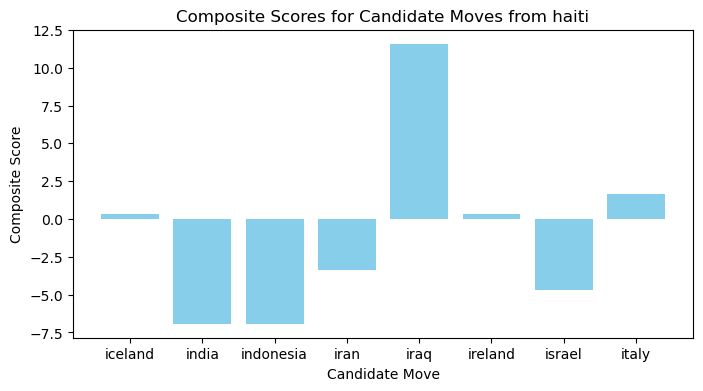

In [21]:
G = build_graph(countries)

# ---------------------------
# 1. Popularity Dictionary (normalized)
# ---------------------------
# Here we assign each country a popularity
popularity = {country: 1 for country in countries} # All equal for simplicity, can change it appropriately
total_popularity = sum(popularity.values())
popularity = {k: v/total_popularity for k, v in popularity.items()}

# ---------------------------
# 2. Local Lookahead Subgraph Function
# ---------------------------
def local_lookahead_subgraph(G, start, depth):
    # Return the induced subgraph of nodes reachable from 'start' within 'depth' moves
    visited = set([start])
    frontier = {start}
    for _ in range(depth):
        new_frontier = set()
        for node in frontier:
            new_frontier.update(set(G.successors(node)))
        visited |= new_frontier
        frontier = new_frontier
    return G.subgraph(visited)

# ---------------------------
# 3. Spectral Gap Computation
# ---------------------------
def compute_spectral_gap(G_sub):
    # Compute the spectral gap (second smallest eigenvalue) of the Laplacian for an undirected subgraph
    UG = G_sub.to_undirected()
    n = UG.number_of_nodes()
    if n < 2:
        return 0.0
    L = nx.laplacian_matrix(UG).astype(float).todense()
    eigvals = np.linalg.eigvals(L)
    eigvals = np.sort(np.real(eigvals))
    tol = 1e-5
    positive_eigs = [eig for eig in eigvals if eig > tol]
    return min(positive_eigs) if positive_eigs else 0.0

# ---------------------------
# 4. Future Move Count Differential
# ---------------------------
def compute_future_move_count(G, nodes_set, depth):
    # For a set of nodes, compute the average number of nodes reachable within the given depth
    counts = []
    for node in nodes_set:
        sub = local_lookahead_subgraph(G, node, depth)
        counts.append(sub.number_of_nodes())
    return np.mean(counts) if counts else 0

# ---------------------------
# 5. Weighted Entropy Functions
# ---------------------------
def adjusted_weight(G, node):
    # Returns the adjusted weight for a node: (Out-degree * normalized popularity)
    pop = popularity.get(node, 1.0)
    return G.out_degree(node) * pop

def weighted_entropy(G, nodes):
    # Computes the weighted Shannon entropy for a set of nodes
    weights = [adjusted_weight(G, n) for n in nodes]
    total = sum(weights)
    if total == 0:
        return 0.0
    entropy = 0.0
    for w in weights:
        if w > 0:
            p = w / total
            entropy -= p * math.log(p, 2)
    return entropy

def opponent_entropy(G, candidate):
    # Computes the weighted entropy for the opponent's immediate moves from candidate
    opp_neighbors = list(G.successors(candidate))
    return weighted_entropy(G, opp_neighbors)

def self_entropy(G, candidate):
    # Estimates our future move entropy by computing the weighted entropy of our moves after each opponent move
    opp_neighbors = list(G.successors(candidate))
    if not opp_neighbors:
        return 0.0
    entropy_list = []
    weights = []
    for opp in opp_neighbors:
        next_moves = list(G.successors(opp))
        ent = weighted_entropy(G, next_moves)
        entropy_list.append(ent)
        weights.append(adjusted_weight(G, opp))
    total_weight = sum(weights)
    if total_weight == 0:
        return 0.0
    avg_entropy = sum(e * (w / total_weight) for e, w in zip(entropy_list, weights))
    return avg_entropy

# ---------------------------
# 6. Evaluate Candidate Move using the 3 Metrics
# ---------------------------
def evaluate_candidate(G, current_node, candidate, my_depth, opp_depth, gamma=1.0):
    '''
    Evaluates a candidate move from current_node using three metrics:
    
    1. Spectral Gap Differential:
       - Opponent's region: immediate successors of candidate (lookahead = opp_depth)
       - Your region: union of nodes reachable from each opponent move (lookahead = my_depth)
       Δ_spec = (Spectral gap of your region) - (Average spectral gap of opponent's region)
    
    2. Future Move Count Differential:
       For each opponent move from candidate:
         - Compute your future move count from that move (lookahead = 1)
         - Compute opponent's move count from that move (lookahead = opp_depth)
       Δ_moves = (Average your move count) - (Average opponent move count)
    
    3. Entropy Differential:
       - H_opp: Weighted entropy for opponent's immediate moves from candidate.
       - H_self: Weighted entropy for your responses after the opponent moves.
       Δ_H = H_self - gamma * H_opp
    
    Composite Score = Δ_spec + Δ_moves + Δ_H
    '''
    
    # 1. Spectral Gap Differential
    # Opponent's region: for each immediate move from candidate, use depth=opp_depth.
    opp_moves = list(G.successors(candidate))
    opp_spec_list = []
    for opp in opp_moves:
        sub_opp = local_lookahead_subgraph(G, opp, opp_depth)
        opp_spec_list.append(compute_spectral_gap(sub_opp))
    avg_opp_spec = np.mean(opp_spec_list) if opp_spec_list else 0.0

    # Your region: union of all nodes reachable from each opponent move using depth=my_depth.
    our_nodes = set()
    for opp in opp_moves:
        our_nodes |= set(local_lookahead_subgraph(G, opp, my_depth).nodes())
    sub_our = G.subgraph(our_nodes)
    my_spec_gap = compute_spectral_gap(sub_our)
    delta_spec = my_spec_gap - avg_opp_spec

    # 2. Future Move Count Differential
    my_future_counts = []
    opp_future_counts = []
    for opp in opp_moves:
        # For each opponent move, count nodes reachable by our responses (depth=1)
        our_moves = list(G.successors(opp))
        if our_moves:
            counts = [local_lookahead_subgraph(G, move, 1).number_of_nodes() for move in our_moves]
            my_future_counts.append(np.mean(counts))
        else:
            my_future_counts.append(0)
        # Opponent's move count: count nodes reachable from opp (depth=opp_depth)
        sub_opp = local_lookahead_subgraph(G, opp, opp_depth)
        opp_future_counts.append(sub_opp.number_of_nodes())
    avg_my_moves = np.mean(my_future_counts) if my_future_counts else 0.0
    avg_opp_moves = np.mean(opp_future_counts) if opp_future_counts else 0.0
    delta_moves = avg_my_moves - avg_opp_moves

    # 3. Entropy Differential
    H_opp = opponent_entropy(G, candidate)
    H_self = self_entropy(G, candidate)
    delta_entropy = H_self - gamma * H_opp

    # Composite Score
    composite = delta_spec + delta_moves + delta_entropy
    metrics = {
        'my_spec_gap': my_spec_gap,
        'avg_opp_spec': avg_opp_spec,
        'delta_spec': delta_spec,
        'avg_my_moves': avg_my_moves,
        'avg_opp_moves': avg_opp_moves,
        'delta_moves': delta_moves,
        'H_self': H_self,
        'H_opp': H_opp,
        'delta_entropy': delta_entropy,
        'composite_score': composite
    }
    return composite, metrics

def select_best_move(G, current_node, my_depth, opp_depth, gamma=1.0):
    # Evaluate all candidate moves (i.e., each successor of current_node) and select the move with the highest composite score.
    candidates = list(G.successors(current_node))
    if not candidates:
        return None, {}, {}
    
    scores = {}
    details = {}
    for cand in candidates:
        score, metrics = evaluate_candidate(G, current_node, cand, my_depth, opp_depth, gamma)
        scores[cand] = score
        details[cand] = metrics
        print(f'Candidate: {cand}, Score: {score:.4f}, Metrics: {metrics}')
    
    best_move = max(scores, key=scores.get)
    return best_move, scores, details

# ---------------------------
# 7. Run the Evaluation for a Given Current Node
# ---------------------------
current_node = 'haiti'
my_depth = 2 # Depth for our future region (after opponent moves)
opp_depth = 1 # Depth for opponent's immediate region (right after candidate move)
gamma = 1.0 # Parameter to weight entropy differential

best_move, candidate_scores, candidate_details = select_best_move(G, current_node, my_depth, opp_depth, gamma)
print(f'\nBest move from {current_node}: {best_move} with composite score {candidate_scores[best_move]:.4f}')

# ---------------------------
# 8. Plot Composite Scores for Each Candidate Move
# ---------------------------
import matplotlib.pyplot as plt

cand_list = list(candidate_scores.keys())
scores_list = [candidate_scores[c] for c in cand_list]

plt.figure(figsize=(8,4))
plt.bar(cand_list, scores_list, color='skyblue')
plt.xlabel('Candidate Move')
plt.ylabel('Composite Score')
plt.title(f'Composite Scores for Candidate Moves from {current_node}')
plt.show()

In [22]:
# ---------------------------
# 1. Popularity Dictionary (normalized)
# ---------------------------
# Here we assign each country a popularity
popularity = {country: 1 for country in countries} # All equal for simplicity, can change it appropriately
total_popularity = sum(popularity.values())
popularity = {k: v/total_popularity for k, v in popularity.items()}

def evaluate_candidate(G, current_node, candidate, popularity, my_depth=2, opp_depth=1, gamma=1.0):
    # Evaluates a candidate move using spectral gap, move count, and entropy
    opp_moves = list(G.successors(candidate))
    if not opp_moves:
        return float('-inf'), {}
    
    # 1. Spectral Gap Differential
    opp_spec_list = []
    for opp in opp_moves:
        sub_opp = local_lookahead_subgraph(G, opp, opp_depth)
        opp_spec_list.append(compute_spectral_gap(sub_opp))
    avg_opp_spec = np.mean(opp_spec_list) if opp_spec_list else 0.0

    our_nodes = set()
    for opp in opp_moves:
        our_nodes |= set(local_lookahead_subgraph(G, opp, my_depth).nodes())
    sub_our = G.subgraph(our_nodes)
    my_spec_gap = compute_spectral_gap(sub_our)
    delta_spec = my_spec_gap - avg_opp_spec

    # 2. Future Move Count Differential
    my_future_counts = []
    opp_future_counts = []
    for opp in opp_moves:
        our_moves = list(G.successors(opp))
        if our_moves:
            counts = [local_lookahead_subgraph(G, move, 1).number_of_nodes() 
                     for move in our_moves]
            my_future_counts.append(np.mean(counts))
        else:
            my_future_counts.append(0)
        sub_opp = local_lookahead_subgraph(G, opp, opp_depth)
        opp_future_counts.append(sub_opp.number_of_nodes())
    
    avg_my_moves = np.mean(my_future_counts) if my_future_counts else 0.0
    avg_opp_moves = np.mean(opp_future_counts) if opp_future_counts else 0.0
    delta_moves = avg_my_moves - avg_opp_moves

    # 3. Entropy Differential
    H_opp = opponent_entropy(G, candidate)
    H_self = self_entropy(G, candidate)
    delta_entropy = H_self - gamma * H_opp

    # Composite Score
    composite = delta_spec + delta_moves + delta_entropy
    
    return composite, {
        'delta_spec': delta_spec,
        'delta_moves': delta_moves,
        'delta_entropy': delta_entropy
    }

def lookahead_strategy_move(G, current_node, used_nodes, popularity):
    # Make a move using the local lookahead strategy
    available_moves = [n for n in G.successors(current_node) if n not in used_nodes]
    if not available_moves:
        return None
    
    scores = {}
    for move in available_moves:
        score, _ = evaluate_candidate(G, current_node, move, popularity)
        scores[move] = score
    
    return max(scores.items(), key=lambda x: x[1])[0]

def random_move(G, current_node, used_nodes):
    # Make a random valid move
    available_moves = [n for n in G.successors(current_node) if n not in used_nodes]
    if not available_moves:
        return None
    return random.choice(available_moves)

def play_game(G, popularity, player1_lookahead=False, player2_lookahead=False):
    # Simulate one game of Atlas
    used_nodes = set()
    current_node = random.choice(list(G.nodes()))
    used_nodes.add(current_node)
    
    while True:
        # Player 1's turn
        if player1_lookahead:
            next_node = lookahead_strategy_move(G, current_node, used_nodes, popularity)
        else:
            next_node = random_move(G, current_node, used_nodes)
            
        if next_node is None:
            return 2 # Player 1 can't move, Player 2 wins
            
        current_node = next_node
        used_nodes.add(current_node)
        
        # Player 2's turn
        if player2_lookahead:
            next_node = lookahead_strategy_move(G, current_node, used_nodes, popularity)
        else:
            next_node = random_move(G, current_node, used_nodes)
            
        if next_node is None:
            return 1 # Player 2 can't move, Player 1 wins
            
        current_node = next_node
        used_nodes.add(current_node)

def run_simulations(n_games=200):
    # Run multiple game simulations
    G = build_graph(countries)
    popularity = {place: random.uniform(0.5, 1.5) for place in countries}
    total = sum(popularity.values())
    popularity = {k: v/total for k, v in popularity.items()}
    
    scenarios = [
        # (True, True, 'Both Lookahead"),
        (True, False, 'P1 Lookahead vs P2 Random'),
        (False, True, 'P1 Random vs P2 Lookahead'),
        # (False, False, 'Both Random')
    ]
    
    for p1_lookahead, p2_lookahead, scenario in scenarios:
        wins = defaultdict(int)
        for _ in range(n_games):
            winner = play_game(G, popularity, p1_lookahead, p2_lookahead)
            wins[winner] += 1
        
        p1_win_rate = wins[1] / n_games * 100
        p2_win_rate = wins[2] / n_games * 100
        
        print(f"\n{scenario}:")
        print(f"Player 1 Win Rate: {p1_win_rate:.2f}%")
        print(f"Player 2 Win Rate: {p2_win_rate:.2f}%")

if __name__ == '__main__':
    print('Running Atlas game simulations using local lookahead strategy...')
    run_simulations(30)

Running Atlas game simulations using local lookahead strategy...

P1 Lookahead vs P2 Random:
Player 1 Win Rate: 66.67%
Player 2 Win Rate: 33.33%

P1 Random vs P2 Lookahead:
Player 1 Win Rate: 33.33%
Player 2 Win Rate: 66.67%


# Task 2 - Community Detection
## Infomap
1. Modeling Game Flow as Information Flow
- **Random Walker Analogy**
    - Infomap treats the game as a flow of information by simulating a random walker that moves from one country to another following the atlas rule. For instance, if the walker is at “India” (ending with “a”), it can only move to countries that begin with “A” (like “Australia”).
- **Direction Matters**
    - Since the atlas graph is directed, Infomap respects the game’s rule: moves only happen in the allowed direction (last letter → first letter). This ensures that the flow modeled by the algorithm exactly mimics the possible moves in the game.
 ---
2. The Map Equation and Community Detection
- **Minimizing Description Length**
Infomap uses an information-theoretic concept called the map equation. It seeks to partition the graph into communities (clusters of countries) in such a way that the description length of a random walker’s journey is minimized. If the walker tends to stay within a certain group of countries, that group is identified as a community.

- **Two-Level Coding**
The algorithm assigns codes at two levels:
    - **Module (Community) Level:** Each community gets a unique code.
    - **Node Level:** Within each community, each country is given its own code.
When the walker moves within a community, only the node-level code is needed. However, moving between communities requires switching to a module-level code. A good community structure is one where most moves are internal, leading to an efficient (compressed) description.
---
3. **Interpreting the Computed Communities**
- **Natural Groupings:**
    In the atlas graph, communities detected by Infomap often represent clusters of countries that are closely interlinked by the game’s rules. For example:

    - **Letter Patterns:**
        - Countries might group together because many have names that start or end with similar letters. A community could consist mostly of countries that start with “A” or end with “n,” reflecting the natural bias in letter transitions.
    - **Choke Points:**
        - Some countries—like Yemen in our example—can act as bridges. Yemen, with incoming edges from countries ending in “y” and outgoing edges to those starting with “n,” might form a critical part of a community or even lie at the interface between communities. Such nodes have high betweenness and become strategic choke points.
- **Alignment with Human Intuition:**
    - When you look at the computed communities, you might notice that they correspond to groupings that humans would naturally recognize. People often group items based on common features; here, countries with similar starting or ending letters, or those that are strategically central in the flow of the game, naturally fall into the same clusters.
---
4. **Strategic Implications for the Game of Atlas**
- **Within-Community Moves:**
    - If you know that a group of countries forms a tightly connected community, playing within that community can be a safe strategy. It means you have many follow-up moves because the transitions (edges) are abundant within the community. This strategy minimizes the risk of leaving your opponent with an immediate winning move.
- **Exploiting Choke Points:**
The Infomap algorithm might reveal that certain countries serve as bridges between communities. Choosing a country that lies on the border (or between) communities could force your opponent into a corner:
    - **Limiting Options:**
        - By steering the game through a choke point, you effectively funnel the game into a region where your opponent’s valid moves are more restricted.
    - **Strategic Advantage:**
        - Even if you cannot immediately play the “ideal” country (for example, you may want to say “Hungary” but the current flow does not allow it), you can opt for a move that guides the game toward that region. This long-term planning—based on the community structure—gives you a competitive edge.
- **Intuition of a “Good” Strategy:**
    - The communities provide insight into the structure of valid moves:
    - **Control the Flow:**
        - By understanding which countries are central within a community or connect multiple communities, you can prioritize moves that maximize your control over the game’s progression.
    - **Predictability:**
        - A move within a dense community might give you more predictable follow-up moves, while a move that transitions between communities could be used to disrupt your opponent’s expected path.

In [23]:
from infomap import Infomap
from typing import Dict, Set, List

def create_node_mappings(G: nx.DiGraph) -> tuple[dict, dict]:
    # Create bidirectional mappings between node names and integer IDs.
    node2id = {node: i for i, node in enumerate(G.nodes())}
    id2node = {i: node for node, i in node2id.items()}
    return node2id, id2node

def run_infomap(G: nx.DiGraph, node2id: dict) -> dict:
    # Run Infomap community detection algorithm.
    im = Infomap('--directed --silent')
    
    for u, v in G.edges():
        im.addLink(node2id[u], node2id[v])
    
    im.run()
    return im

def visualize_communities_interactive(G: nx.DiGraph, partition: dict, 
                                   filename: str = 'infomap_communities.html',
                                   height: str = '750px') -> None:
    '''
    Create interactive visualization of communities using pyvis.
    
    Args:
        G: Input graph
        partition: Mapping from nodes to their communities
        filename: Output HTML file name
        height: Height of the visualization
    '''
    # Create a Pyvis network
    net = Network(height=height, width='100%', bgcolor='#ffffff', 
                 font_color='black', directed=True)
    
    # Generate distinct colors for each community
    unique_communities = set(partition.values())
    colors = generate_colors(len(unique_communities))
    community_colors = dict(zip(unique_communities, colors))
    
    # Add nodes with community colors
    for node in G.nodes():
        community = partition.get(node, 0)
        net.add_node(node,
                    label=node.title(), # Capitalize country names
                    color=community_colors[community],
                    title=f'Community: {community}', # Hover text
                    size=20) # Node size
    
    # Add edges
    for edge in G.edges():
        net.add_edge(edge[0], edge[1], color='#808080', arrows='to')

    net.set_options("""
    var options = {
        "nodes": {
            "font": {
                "size": 12
            }
        },
        "edges": {
            "arrows": {
                "to": {
                    "enabled": true,
                    "scaleFactor": 0.5
                }
            },
            "smooth": {
                "type": "continuous",
                "forceDirection": "none"
            }
        },
        "physics": {
            "forceAtlas2Based": {
                "gravitationalConstant": -100,
                "centralGravity": 0.01,
                "springLength": 200,
                "springConstant": 0.08,
                "damping": 0.4,
                "avoidOverlap": 1
            },
            "minVelocity": 23,
            "solver": "forceAtlas2Based"
        }
    }
    """)
    
    # Save the visualization
    net.show(filename)

def generate_colors(n: int) -> List[str]:
    # Generate n distinct colors in hex format.
    colors = []
    for i in range(n):
        # Generate colors in HSV space for better distinction
        hue = i / n
        # Fixed saturation and value for vibrant but not too bright colors
        saturation = 0.7
        value = 0.9
        
        # Convert HSV to RGB
        rgb = hsv_to_rgb(hue, saturation, value)
        
        # Convert RGB to hex
        color = '#%02x%02x%02x' % (int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))
        colors.append(color)
    return colors

def hsv_to_rgb(h: float, s: float, v: float) -> tuple:
    # Convert HSV color values to RGB.
    if s == 0.0:
        return (v, v, v)
    
    i = int(h * 6.0)
    f = (h * 6.0) - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))
    i = i % 6
    
    if i == 0:
        return (v, t, p)
    if i == 1:
        return (q, v, p)
    if i == 2:
        return (p, v, t)
    if i == 3:
        return (p, q, v)
    if i == 4:
        return (t, p, v)
    if i == 5:
        return (v, p, q)

def evaluate_community_quality(G: nx.DiGraph, partition: dict) -> dict:
    '''
    Evaluate community quality using multiple metrics.
    Returns a dictionary of metrics.
    '''
    # Convert communities dict to list of sets format
    communities = {}
    for node, comm in partition.items():
        if comm not in communities:
            communities[comm] = set()
        communities[comm].add(node)
    communities = list(communities.values())
    
    # Calculate modularity
    modularity = nx.community.modularity(G, communities)
    
    # Calculate coverage (ratio of intra-community edges to total edges)
    intra_edges = sum(1 for e in G.edges() if partition[e[0]] == partition[e[1]])
    coverage = intra_edges / G.number_of_edges()
    
    # Calculate conductance (fraction of edges that point outside the community)
    total_conductance = 0
    for comm in communities:
        external_edges = sum(1 for u, v in G.edges() 
                           if (u in comm) != (v in comm))
        total_edges = sum(1 for u, v in G.edges() 
                         if u in comm or v in comm)
        if total_edges > 0:
            conductance = external_edges / total_edges
            total_conductance += conductance
    avg_conductance = total_conductance / len(communities)
    
    # Performance (fraction of correctly placed node pairs)
    possible_pairs = G.number_of_nodes() * (G.number_of_nodes() - 1) / 2
    correct_pairs = sum(len(c) * (len(c) - 1) / 2 for c in communities)
    performance = correct_pairs / possible_pairs

    return {
        'modularity': modularity,
        'coverage': coverage,
        'avg_conductance': avg_conductance,
        'performance': performance,
        'num_communities': len(communities),
        'avg_community_size': sum(len(c) for c in communities) / len(communities)
    }

def main():
    # Build the graph
    G = build_graph(countries)
    print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    
    # Create node mappings
    node2id, id2node = create_node_mappings(G)
    
    try:
        # Run Infomap
        im = run_infomap(G, node2id)
        print(f"\nInfomap found {im.numTopModules()} communities")
        
        # Create partition dictionary
        partition = {}
        for node_id, module in im.modules:
            partition[id2node[node_id]] = module
        
        # Print community assignments
        print('\nCommunity Assignments:')
        for node, module in sorted(partition.items()):
            print(f"  {node}: {module}")
        
        # Evaluate community quality
        metrics = evaluate_community_quality(G, partition)
        print('\nCommunity Quality Metrics:')
        print(f"Modularity: {metrics['modularity']:.4f}")
        print(f"Coverage: {metrics['coverage']:.4f}")
        print(f"Average Conductance: {metrics['avg_conductance']:.4f}")
        print(f"Performance: {metrics['performance']:.4f}")
        print(f"Number of Communities: {metrics['num_communities']}")
        print(f"Average Community Size: {metrics['avg_community_size']:.2f}")
        
        # Create interactive visualization
        visualize_communities_interactive(G, partition)
        print("\nVisualization saved as 'infomap_communities.html'")
        
    except Exception as e:
        print(f'Error during community detection: {e}')
        return

if __name__ == '__main__':
    main()

Graph created with 192 nodes and 2001 edges

Infomap found 21 communities

Community Assignments:
  afghanistan: 1
  albania: 1
  algeria: 1
  andorra: 1
  angola: 1
  antigua and barbuda: 1
  argentina: 1
  armenia: 1
  australia: 1
  austria: 1
  azerbaijan: 1
  bahamas: 2
  bahrain: 13
  bangladesh: 12
  barbados: 2
  belarus: 2
  belgium: 14
  belize: 2
  benin: 15
  bhutan: 16
  bolivia: 1
  bosnia and herzegovina: 1
  botswana: 1
  brazil: 7
  brunei darussalam: 17
  bulgaria: 1
  burkina faso: 3
  burundi: 8
  cabo verde: 9
  cambodia: 9
  cameroon: 9
  canada: 9
  central african republic: 9
  chad: 9
  chile: 9
  china: 9
  colombia: 9
  comoros: 2
  congo: 9
  costa rica: 9
  croatia: 9
  cuba: 9
  cyprus: 2
  czechia: 9
  côte d'ivoire: 9
  denmark: 3
  djibouti: 8
  dominica: 3
  dominican republic: 9
  dr congo: 3
  ecuador: 4
  egypt: 10
  el salvador: 4
  equatorial guinea: 2
  eritrea: 2
  estonia: 2
  eswatini: 8
  ethiopia: 2
  fiji: 8
  finland: 3
  france: 2
  gabon

### Note: From now on, run all the cells in Google Colab, the code is included here just so that it's all in one place

## GAE with GCN and HDBSCAN

In [ ]:
import hdbscan
import networkx as nx
import numpy as np
from pyvis.network import Network
import random
import string
import torch
from torch_geometric.nn import GCNConv, GAE
from torch_geometric.utils import from_networkx
import torch.nn.functional as F
import torch.optim as optim

########################################
# 1. Build the Atlas Directed Graph
########################################

# Create a directed graph using NetworkX.
G_nx = nx.DiGraph()
G_nx.add_nodes_from(countries)

# Define the Atlas game rule: an edge from A to B if the last letter of A equals the first letter of B.
def can_move(a, b):
    return a[-1].lower() == b[0].lower()

# Add edges following the rule.
for a in countries:
    for b in countries:
        if a != b and can_move(a, b):
            G_nx.add_edge(a, b)

print('Nodes in graph:', list(G_nx.nodes()))
print('Edges in graph:', list(G_nx.edges()))

########################################
# 2. Create Node Features (52-dimensional)
########################################

# One-hot encode the first and last letters of each country.
alphabet = list(string.ascii_lowercase)

def one_hot_first_last(country):
    '''
    Returns a 52-dim one-hot encoded vector:
      - First 26 entries for the first letter.
      - Last 26 entries for the last letter.
    '''
    country = country.lower()
    vec = [0] * 52
    first_letter = country[0]
    last_letter = country[-1]
    
    if first_letter in alphabet:
        idx = alphabet.index(first_letter)
        vec[idx] = 1
    if last_letter in alphabet:
        idx = alphabet.index(last_letter)
        vec[26 + idx] = 1  # Offset by 26 for the last letter.
    return vec

# Build the feature matrix.
features = np.array([one_hot_first_last(country) for country in countries], dtype=np.float32)
print('\nFeatures for each country:')
for country, feat in zip(countries, features):
    print(f'{country}: {feat}')

########################################
# 3. Convert to PyTorch Geometric Data Object
########################################

# Convert the NetworkX graph into a PyTorch Geometric data object.
data = from_networkx(G_nx)
# Assign the computed 52-dimensional features.
data.x = torch.tensor(features)

########################################
# 4. Define and Train a GNN (Graph Autoencoder)
########################################

# Define a simple GCN-based encoder.
class GCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Set dimensions.
in_channels = data.num_features  # 52 from our one-hot encoding.
hidden_channels = 8              # Hidden dimension (adjustable).
latent_dim = 4                   # Dimension of the embedding space.

# Create the Graph Autoencoder (GAE) model.
encoder = GCNEncoder(in_channels, hidden_channels, latent_dim)
model = GAE(encoder)

# Set device.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
data = data.to(device)

# Set up the optimizer.
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model.
model.train()
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    z = model.encode(data.x, data.edge_index)  # Compute embeddings.
    loss = model.recon_loss(z, data.edge_index)  # Reconstruction loss using inner product decoder.
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

########################################
# 5. Extract Embeddings and Cluster with HDBSCAN
########################################

model.eval()
with torch.no_grad():
    z = model.encode(data.x, data.edge_index)

# Convert embeddings to a NumPy array.
embeddings = z.cpu().detach().numpy()
print('\nLearned Embeddings:\n', embeddings)

# Cluster the embeddings using HDBSCAN.
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
cluster_labels = clusterer.fit_predict(embeddings)
print('\nHDBSCAN Cluster Labels:', cluster_labels)

# Map cluster labels back to the original country names.
cluster_mapping = {country: cluster_labels[i] for i, country in enumerate(countries)}
for country, label in cluster_mapping.items():
    print(f'{country}: Cluster {label}')

########################################
# 6. Visualize Communities Using Pyvis
########################################

# Create a Pyvis network.
net = Network(height='800px', width='100%', directed=True)
net.set_options("""
    var options = {
        "nodes": {
            "font": {
                "size": 12
            }
        },
        "edges": {
            "arrows": {
                "to": {
                    "enabled": true,
                    "scaleFactor": 0.5
                }
            },
            "smooth": {
                "type": "continuous",
                "forceDirection": "none"
            }
        },
        "physics": {
            "forceAtlas2Based": {
                "gravitationalConstant": -100,
                "centralGravity": 0.01,
                "springLength": 200,
                "springConstant": 0.08,
                "damping": 0.4,
                "avoidOverlap": 1
            },
            "minVelocity": 23,
            "solver": "forceAtlas2Based"
        }
    }
""")

# Create a color mapping for clusters.
# For noise (cluster -1), use black.
unique_clusters = np.unique(cluster_labels)
color_map = {}
for cl in unique_clusters:
    if cl == -1:
        color_map[cl] = '#000000'
    else:
        # Generate a random hex color.
        color_map[cl] = '#{:06x}'.format(random.randint(0, 0xFFFFFF))

# Add nodes with the cluster color.
for node in G_nx.nodes():
    cl = cluster_mapping[node]
    net.add_node(node, label=node, title=f"Cluster {cl}", color=color_map[cl])

# Add edges.
for source, target in G_nx.edges():
    net.add_edge(source, target)

# Show the interactive visualization.
fileName = 'gnn_communities.html'
net.show(fileName, notebook=False)

In [ ]:
from google.colab import files
files.download('gnn_communities.html')

# Task 3 - Link Prediction

In [ ]:
import networkx as nx
import numpy as np
import random
from sklearn.metrics import roc_auc_score
import string
import torch
from torch_geometric.nn import GCNConv, Node2Vec
from torch_geometric.utils import from_networkx, negative_sampling
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from typing import Tuple, List, Dict

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def relabel_with_attributes(G):
    # Convert node labels to integers while preserving original labels as attributes
    mapping = {node: idx for idx, node in enumerate(G.nodes())}
    G_int = nx.DiGraph()
    
    # Add nodes with attributes
    for old_label, new_label in mapping.items():
        G_int.add_node(new_label, name=old_label)
    
    # Add edges using new labels
    for u, v in G.edges():
        G_int.add_edge(mapping[u], mapping[v])
    
    return G_int, mapping

def create_node_features(G):
    # Create node features
    num_nodes = G.number_of_nodes()
    
    # One-hot encoding for first and last letters (52 features)
    letter_features = np.zeros((num_nodes, 52))
    
    # Graph structural features (5 features)
    structural_features = np.zeros((num_nodes, 5))
    
    # Word length features (1 feature)
    length_features = np.zeros((num_nodes, 1))
    
    for node in G.nodes():
        name = G.nodes[node]['name'].lower()
        
        # Letter features
        if name[0] in string.ascii_lowercase:
            letter_features[node, ord(name[0]) - ord('a')] = 1
        if name[-1] in string.ascii_lowercase:
            letter_features[node, 26 + (ord(name[-1]) - ord('a'))] = 1
        
        # Structural features
        structural_features[node, 0] = G.in_degree(node) / num_nodes # Normalized in-degree
        structural_features[node, 1] = G.out_degree(node) / num_nodes # Normalized out-degree
        structural_features[node, 2] = nx.clustering(G.to_undirected(), node) # Clustering coefficient
        
        # PageRank and betweenness centrality
        pr = nx.pagerank(G)
        bc = nx.betweenness_centrality(G)
        structural_features[node, 3] = pr[node]
        structural_features[node, 4] = bc[node]
        
        # Word length (normalized)
        length_features[node, 0] = len(name) / 15 # Normalize by typical max length
    
    # Combine all features
    features = np.hstack([letter_features, structural_features, length_features])
    return torch.FloatTensor(features)

def train_test_split_edges(G, test_frac: float = 0.2):
    # Split edges ensuring graph remains connected and proper negative sampling
    edges = list(G.edges())
    n_test = max(1, int(len(edges) * test_frac))
    
    # Try splitting until we get a connected training graph
    while True:
        random.shuffle(edges)
        test_edges = edges[:n_test]
        train_edges = edges[n_test:]
        
        G_train = G.copy()
        G_train.remove_edges_from(test_edges)
        
        if nx.is_weakly_connected(G_train):
            break
    
    # Sample hard negative edges (realistic but invalid moves)
    n_nodes = G.number_of_nodes()
    neg_edges = []
    existing_edges = set(G.edges())
    nodes = list(G.nodes())
    
    # Create negative edges that look plausible but are invalid
    while len(neg_edges) < len(test_edges):
        source = random.choice(nodes)
        source_name = G.nodes[source]['name']
        
        # Find target that starts with a letter different from source's last letter
        while True:
            target = random.choice(nodes)
            if target != source:
                target_name = G.nodes[target]['name']
                if source_name[-1] != target_name[0] and (source, target) not in existing_edges:
                    neg_edges.append((source, target))
                    break
    
    return G_train, test_edges, neg_edges

class GNNEncoder(nn.Module):
    # GNN model for link prediction
    def __init__(self, in_channels: int, hidden_channels: int, out_channels: int):
        super(GNNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, out_channels)
        
        self.batch_norm1 = nn.BatchNorm1d(hidden_channels)
        self.batch_norm2 = nn.BatchNorm1d(hidden_channels)
        
    def forward(self, x, edge_index):
        # First layer
        x = self.conv1(x, edge_index)
        x = self.batch_norm1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)
        
        # Second layer
        x = self.conv2(x, edge_index)
        x = self.batch_norm2(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)
        
        # Third layer
        x = self.conv3(x, edge_index)
        return x

def margin_loss(pos_score, neg_score, margin=0.5):
    # Margin loss for link prediction
    return F.relu(margin - pos_score + neg_score).mean()

def train_node2vec(G_train, embedding_dim=128):
    # Train Node2Vec model with improved parameters
    data = from_networkx(G_train)
    
    model = Node2Vec(
        data.edge_index,
        embedding_dim=embedding_dim,
        walk_length=20,  # Longer walks
        context_size=10,  # Larger context
        walks_per_node=20,  # More walks
        p=0.2,  # Favor DFS-like exploration
        q=2.0,  # Favor local structure
        sparse=True
    ).to(device)
    
    optimizer = torch.optim.SparseAdam(model.parameters(), lr=0.01)
    loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
    
    model.train()
    total_loss = 0
    for epoch in range(200):  # More epochs
        epoch_loss = 0
        for pos_rw, neg_rw in loader:
            optimizer.zero_grad()
            loss = model.loss(pos_rw.to(device), neg_rw.to(device))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        total_loss = epoch_loss / len(loader)
        if epoch % 10 == 0:
            print(f'Node2Vec Epoch: {epoch:02d}, Loss: {total_loss:.4f}')
    
    return model

def evaluate_model(embeddings, test_edges, neg_edges):
    '''
    Evaluate link prediction performance using ROC AUC.
    
    Args:
        embeddings: Node embeddings from model
        test_edges: Positive test edges
        neg_edges: Negative test edges
    '''
    scores = []
    labels = []
    
    # Compute scores for positive edges
    for src, dst in test_edges:
        score = float((embeddings[src] * embeddings[dst]).sum())
        scores.append(score)
        labels.append(1)
    
    # Compute scores for negative edges
    for src, dst in neg_edges:
        score = float((embeddings[src] * embeddings[dst]).sum())
        scores.append(score)
        labels.append(0)
    
    return roc_auc_score(labels, scores)

def analyze_predictions(model, data, test_edges, neg_edges, mapping):
    '''
    Analyze model predictions in detail.
    
    Args:
        model: Trained model (GNN)
        data: PyG data object
        test_edges: Positive test edges
        neg_edges: Negative test edges
        mapping: Node index to name mapping
    '''
    model.eval()
    reverse_mapping = {idx: name for name, idx in mapping.items()}
    
    with torch.no_grad():
        embeddings = model(data.x, data.edge_index)
        
        # Analyze positive edges
        pos_predictions = []
        for src, dst in test_edges:
            score = float((embeddings[src] * embeddings[dst]).sum())
            src_name = reverse_mapping[src]
            dst_name = reverse_mapping[dst]
            pos_predictions.append({
                'src': src_name,
                'dst': dst_name,
                'score': score,
                'correct': src_name[-1].lower() == dst_name[0].lower()
            })
        
        # Analyze negative edges
        neg_predictions = []
        for src, dst in neg_edges:
            score = float((embeddings[src] * embeddings[dst]).sum())
            src_name = reverse_mapping[src]
            dst_name = reverse_mapping[dst]
            neg_predictions.append({
                'src': src_name,
                'dst': dst_name,
                'score': score,
                'correct': src_name[-1].lower() != dst_name[0].lower()
            })
        
        # Sort by scores
        pos_predictions.sort(key=lambda x: x['score'], reverse=True)
        neg_predictions.sort(key=lambda x: x['score'])
        
        print('\nTop 5 Highest Scoring Valid Moves:')
        for pred in pos_predictions[:5]:
            print(f"{pred['src']} -> {pred['dst']}: {pred['score']:.4f}")
        
        print('\nTop 5 Lowest Scoring Invalid Moves:')
        for pred in neg_predictions[:5]:
            print(f"{pred['src']} -> {pred['dst']}: {pred['score']:.4f}")
        
        # Calculate metrics
        pos_correct = sum(1 for p in pos_predictions if p['correct'])
        neg_correct = sum(1 for p in neg_predictions if p['correct'])
        
        print(f"\nAccuracy on valid moves: {pos_correct/len(pos_predictions):.4f}")
        print(f"Accuracy on invalid moves: {neg_correct/len(neg_predictions):.4f}")
        
        # Score distributions
        pos_scores = [p['score'] for p in pos_predictions]
        neg_scores = [p['score'] for p in neg_predictions]
        
        print(f'\nScore Statistics:')
        print(f'Valid moves - Mean: {np.mean(pos_scores):.4f}, Std: {np.std(pos_scores):.4f}')
        print(f'Invalid moves - Mean: {np.mean(neg_scores):.4f}, Std: {np.std(neg_scores):.4f}')
        
        return {
            'pos_predictions': pos_predictions,
            'neg_predictions': neg_predictions,
            'metrics': {
                'pos_accuracy': pos_correct/len(pos_predictions),
                'neg_accuracy': neg_correct/len(neg_predictions),
                'pos_mean': np.mean(pos_scores),
                'neg_mean': np.mean(neg_scores)
            }
        }
        
def main():
    G = build_graph(countries)
    G_int, mapping = relabel_with_attributes(G)
    
    # Split edges
    G_train, test_edges, neg_edges = train_test_split_edges(G_int)
    
    print('Graph Statistics:')
    print(f'Nodes: {G.number_of_nodes()}')
    print(f'Total Edges: {G.number_of_edges()}')
    print(f'Training Edges: {len(G_train.edges())}')
    print(f'Test Edges: {len(test_edges)}')
    
    # Train Node2Vec
    print('\nTraining Node2Vec...')
    n2v_model = train_node2vec(G_train)
    n2v_embeddings = n2v_model()
    n2v_auc = evaluate_model(n2v_embeddings, test_edges, neg_edges)
    print(f'Node2Vec ROC AUC: {n2v_auc:.4f}')
    
    # Train GNN
    print('\nTraining GNN...')
    data = from_networkx(G_train)
    data.x = create_node_features(G_train).to(device)
    data.edge_index = data.edge_index.to(device)
    
    gnn_model = GNNEncoder(in_channels=58, hidden_channels=128, out_channels=64).to(device)
    optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.7, patience=10)
    
    best_auc = 0
    patience = 20
    no_improve = 0
    
    for epoch in tqdm(range(150)):
        gnn_model.train()
        optimizer.zero_grad()
        
        z = gnn_model(data.x, data.edge_index)
        
        # Get positive edges
        pos_edge_index = data.edge_index
        
        # Generate hard negative edges
        neg_edge_index = negative_sampling(
            edge_index=pos_edge_index,
            num_nodes=data.num_nodes,
            num_neg_samples=pos_edge_index.size(1)
        )
        
        # Compute scores
        pos_score = (z[pos_edge_index[0]] * z[pos_edge_index[1]]).sum(dim=1)
        neg_score = (z[neg_edge_index[0]] * z[neg_edge_index[1]]).sum(dim=1)
        
        # Combined loss with margin
        loss = margin_loss(pos_score, neg_score)
        
        loss.backward()
        optimizer.step()
        
        # Evaluate every 10 epochs
        if epoch % 10 == 0:
            gnn_model.eval()
            with torch.no_grad():
                z = gnn_model(data.x, data.edge_index)
                auc = evaluate_model(z, test_edges, neg_edges)
                print(f'GNN Epoch {epoch:03d}, Loss: {loss.item():.4f}, AUC: {auc:.4f}')
                
                scheduler.step(auc)
                
                if auc > best_auc:
                    best_auc = auc
                    no_improve = 0
                else:
                    no_improve += 1
                
                if no_improve >= patience:
                    print('Early stopping!')
                    break
    
    print(f'\nFinal Results:')
    print(f'Node2Vec AUC: {n2v_auc:.4f}')
    print(f'GNN AUC: {best_auc:.4f}')
    
    # Analyze predictions
    print('\nAnalyzing GNN Predictions...')
    gnn_analysis = analyze_predictions(gnn_model, data, test_edges, neg_edges, mapping)

if __name__ == "__main__":
    main()